## Logistic Regression

**Binary Classification:** Predicting if a person would buy life Insurnace based on his age using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


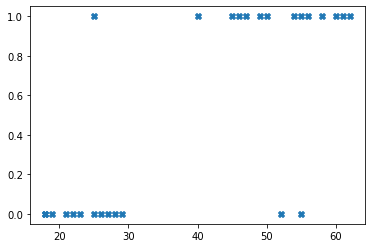

In [3]:
plt.scatter(df.age, df.bought_insurance, marker = 'X');

## Splitting the rows into training and test split

In [4]:
df.shape

(27, 2)

In [5]:
# training data = 90 %
# testing data = 10 %
import random
random.seed(1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split((df[['age']]), df.bought_insurance, train_size = 0.9)

In [6]:
x_test, df.head()

(    age
 9    61
 3    52
 26   23,
    age  bought_insurance
 0   22                 0
 1   25                 0
 2   47                 1
 3   52                 0
 4   46                 1)

In [7]:
from sklearn.linear_model import LogisticRegression

# create an object of logistic regression class
model = LogisticRegression()

# training the model
model.fit(x_train, y_train)

LogisticRegression()

In [8]:
# making prediction for x_test array
model.predict(x_test)

array([1, 1, 0], dtype=int64)

In [9]:
model.score(x_test, y_test)

0.6666666666666666

In [10]:
model.predict_proba(x_test)

array([[0.0196852 , 0.9803148 ],
       [0.07751791, 0.92248209],
       [0.89434234, 0.10565766]])

In [11]:
model.predict(x_test)

array([1, 1, 0], dtype=int64)

In [24]:
model.coef_

array([[0.15904977]])

In [12]:
model.intercept_

array([-5.79402899])

In [13]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [14]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [15]:
age = 35
prediction_function(age)

0.4850044983805899

In [16]:
age = 40
prediction_function(age)

0.5374298453437496

In [17]:
age = 45
prediction_function(age)

0.5890404340586651

In [18]:
age = 50
prediction_function(age)

0.6387631751488418

In [19]:
age = 55
prediction_function(age)

0.6856801139382539

In [20]:
age = 60
prediction_function(age)

0.7290879223493065

## Employee retention 

Employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics. 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [32]:
df = pd.read_csv("data/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [33]:
df.size

149990

In [50]:
# Checking for missing data points
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [35]:
left = df[df.left==1]
left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [36]:
left = df[df.left==0]
left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [37]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

1. **Satisfaction Level**: Satisfaction level seems to be relatively low (`0.44`) in employees leaving the firm vs the retained ones (`0.66`)
2. **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
3. **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm.

### Impact of salary on employee retention

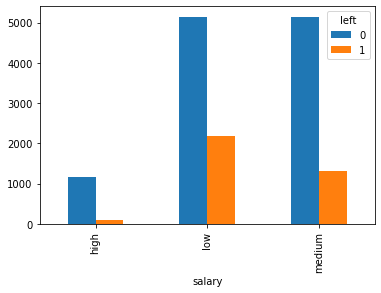

In [42]:
# Plot that compares salaries of the people who left the firm vs the people who did not leave the firm.

pd.crosstab(df.salary, df.left).plot(kind='bar');

#### Observation 1
* Above bar chart shows employees with high salaries are likely to not leave the company

In [43]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Co-relation between department and employee retention

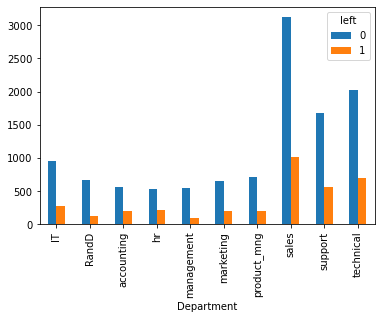

In [45]:
pd.crosstab(df.Department, df.left).plot(kind='bar');

#### Observation 2:

* Sales department, followed by Technical and support departments saw a huge spike leaving rate. But we don't see a strong co-relation.

<h3 style="color:purple">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>Satisfaction Level</li>
    <li>Average Monthly Hours</li>
    <li>Promotion Last 5 Years</li>
    <li>Salary</li>
</ol>

Now build logistic regression model using variables that were narrowed down in step 1


In [53]:
df1 = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
df1.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [56]:
# One Hot Encoding - dummy variable method

salary_dummies = pd.get_dummies(df1.salary, prefix="salary")
df_with_dummies = pd.concat([df1,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


Now we need to remove salary column which is text data. It is already replaced by dummy variables so we can safely remove it

In [57]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [58]:
x = df_with_dummies
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [68]:
y = df.left

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.3)

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [71]:
model.fit(x_train, y_train)

LogisticRegression()

In [72]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

**Accuracy of the model**

In [73]:
model.score(x_test,y_test)

0.7752380952380953